In [1]:
import pandas as pd
import requests
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules  

# 1. Ekstrak dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/groceries.csv"
response = requests.get(url)
data_content = response.text

# 2. Parsing Data
dataset = [line.split(',') for line in data_content.strip().split('\n') if line]


print(f"Total transactions: {len(dataset)}")
print(f"Contoh Transaki ke-1: {dataset[0]}")
print(f"Contoh Transaki ke-9: {dataset[8]}")

# 3. Encoding (Ubah ke format one-hot)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

print("\nInfo Dataframe :")
print(df.columns[:5])



Total transactions: 9835
Contoh Transaki ke-1: ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']
Contoh Transaki ke-9: ['pot plants']

Info Dataframe :
Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics'],
      dtype='object')


In [2]:
# 4. Cari Frequent Itemsets 

frequent_itemsets = apriori (df, min_support=0.01, use_colnames=True)

# 5. Buat Rules (cari nilai confidencenya )
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

#  6. Merapikan hasil & sorting berdasarkan lift tertinggi 
hasil = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
hasil_sorted = hasil.sort_values(by='lift', ascending=False)

print("\nTop 10 Aturan Aosiasi Terkuat ")
print(hasil_sorted.head(10))


Top 10 Aturan Aosiasi Terkuat 
                            antecedents         consequents   support  \
74     (citrus fruit, other vegetables)   (root vegetables)  0.010371   
96   (other vegetables, tropical fruit)   (root vegetables)  0.012303   
1                                (beef)   (root vegetables)  0.017387   
73      (citrus fruit, root vegetables)  (other vegetables)  0.010371   
95    (root vegetables, tropical fruit)  (other vegetables)  0.012303   
98       (whole milk, other vegetables)   (root vegetables)  0.023183   
79                   (whole milk, curd)            (yogurt)  0.010066   
91        (rolls/buns, root vegetables)  (other vegetables)  0.012201   
100           (root vegetables, yogurt)  (other vegetables)  0.012913   
121        (whole milk, tropical fruit)            (yogurt)  0.015150   

     confidence      lift  
74     0.359155  3.295045  
96     0.342776  3.144780  
1      0.331395  3.040367  
73     0.586207  3.029608  
95     0.584541  3.02099

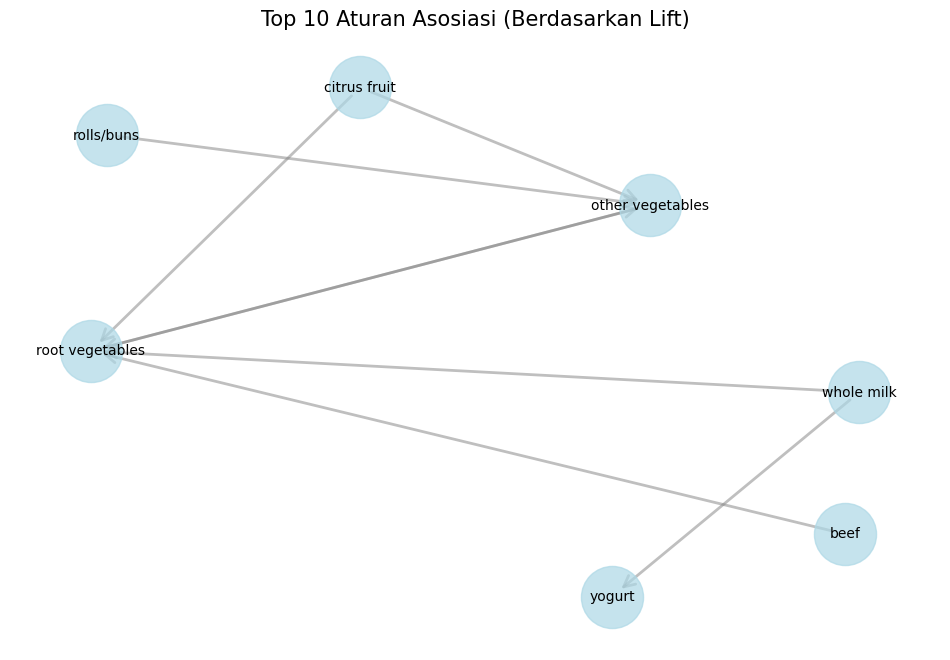

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Filter Data (10 data tertinggi)
top_rules = hasil_sorted.head(10)

# 2. Inisialisasi Graph 
G = nx.DiGraph()

# 3. Menambahkan Node dan Edge ke Graph
for i, row in top_rules.iterrows():
    # Mengambil nama item dari frozenset
    # Antecedent (Penyebab) -> Consequent (Akibat)
    
    # Note: list(..)[0] diasumsikan item tunggal untuk penyederhanaan visual
    pembelian_awal = list(row['antecedents'])[0] 
    pembelian_berikutnya = list(row['consequents'])[0]
    
    # Nilai weight bisa kita pakai Lift atau Confidence
    weight = row['lift']
    
    # Tambahkan ke graph: (Awal) --panah--> (Berikutnya)
    G.add_edge(pembelian_awal, pembelian_berikutnya, weight=weight)

# 4. Menggambar Graph
plt.figure(figsize=(12, 8))

# Tata letak node (spring_layout mencoba memisahkan node agar tidak menumpuk)
pos = nx.spring_layout(G, k=2) 

# Gambar Node
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.7)

# Gambar Label (Nama Barang)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Gambar Panah (Edge)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray', arrowstyle='->', arrowsize=20)

plt.title('Top 10 Aturan Asosiasi (Berdasarkan Lift)', fontsize=15)
plt.axis('off') # Hilangkan sumbu X dan Y
plt.show()